### Select the Right Threshold values using ROC Curve

in Support Vector Machines (SVM), a kernel is a function that is used to transform the input data into a higher-dimensional space. The kernel trick allows SVM to efficiently perform nonlinear classification by finding a hyperplane that separates the data in the transformed space.

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [ ]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [ ]:
X.shape

(2000, 20)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [ ]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Make predictions on the training and testing data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate and print the confusion matrix for training and testing data
print("Confusion Matrix for Training Data:")
print(confusion_matrix(y_train, y_train_pred))

print("Confusion Matrix for Testing Data:")
print(confusion_matrix(y_test, y_test_pred))

# Calculate and print the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

Confusion Matrix for Training Data:
[[697   0]
 [  0 703]]
Confusion Matrix for Testing Data:
[[288  12]
 [ 16 284]]
Testing Accuracy: 95.33%


In [ ]:
ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.25, 0.75]])

The ROC (Receiver Operating Characteristic) curve help evaluate the performance of a binary classification model. ROC curve is created by plotting the TPR against the FPR at different thresholds. The Area Under the ROC Curve (AUC-ROC) summarizes the classifier's overall performance. Higher AUC-ROC values indicate better model performance.







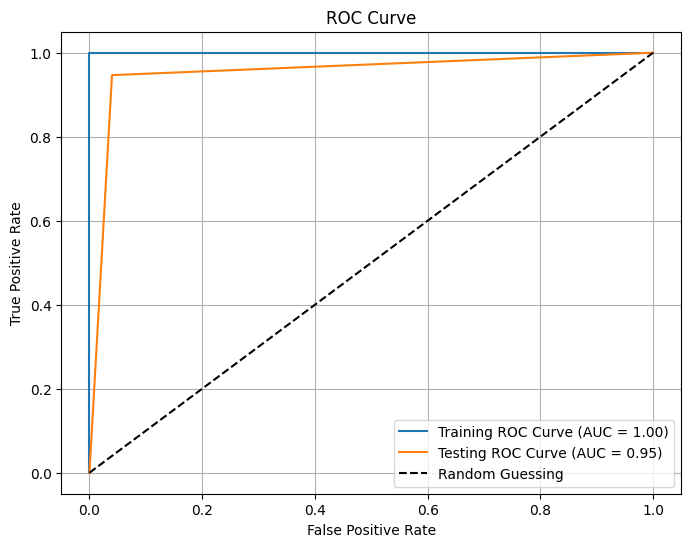

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming we already have X_train, X_test, y_train, y_test
# If not, we can use train_test_split to split your data into training and testin

# Calculate ROC curve and AUC for training and testing data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)

# Calculate AUC for training and testing data
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)

# Plot ROC curve for training and testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


threshold is a value used to convert the predicted probabilities into binary class labels. If the predicted probability for an instance is greater than or equal to the threshold, it is classified as the positive class; otherwise, it is classified as the negative class.

Confusion Matrix:
[[276  24]
 [  9 291]]
Testing Accuracy: 94.50%


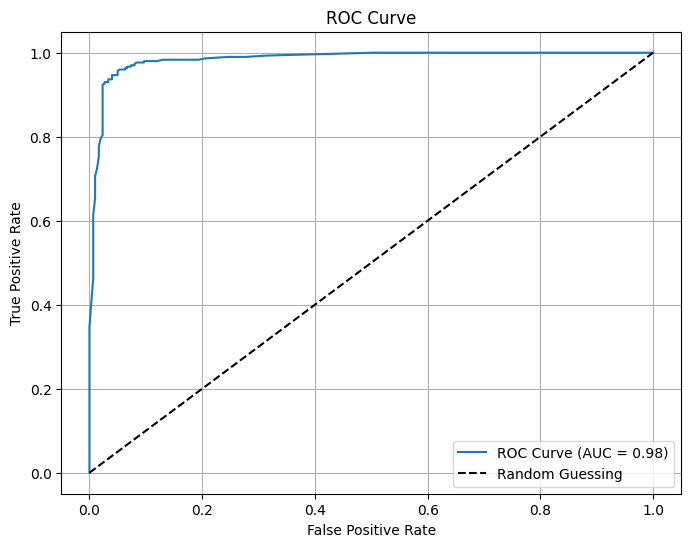

In [ ]:

# Make predictions on the testing data using predict_proba
y_test_prob = rf_model.predict_proba(X_test)[:, 1]

# Custom threshold (e.g., 0.3)
custom_threshold = 0.3

# Convert predicted probabilities to binary class labels using the custom threshold
y_test_pred = (y_test_prob >= custom_threshold).astype(int)

# Now y_test_pred contains the binary class labels based on the custom threshold
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

#Calculate and print the testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

# Calculate ROC curve and AUC for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


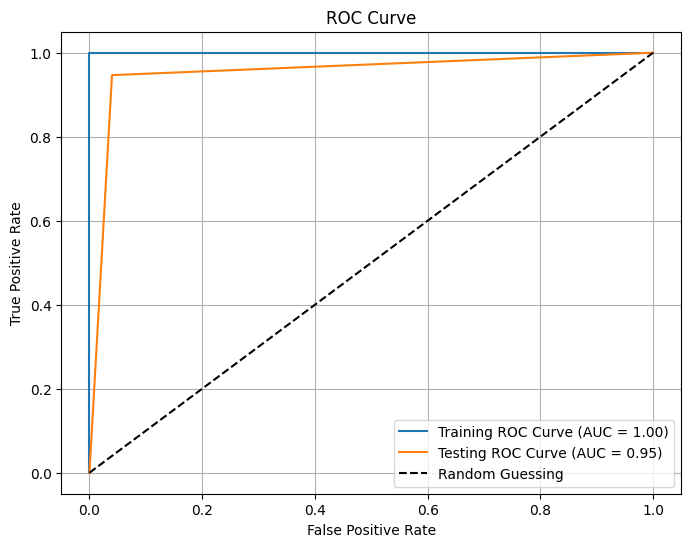

In [ ]:
# Plot ROC curve for training and testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


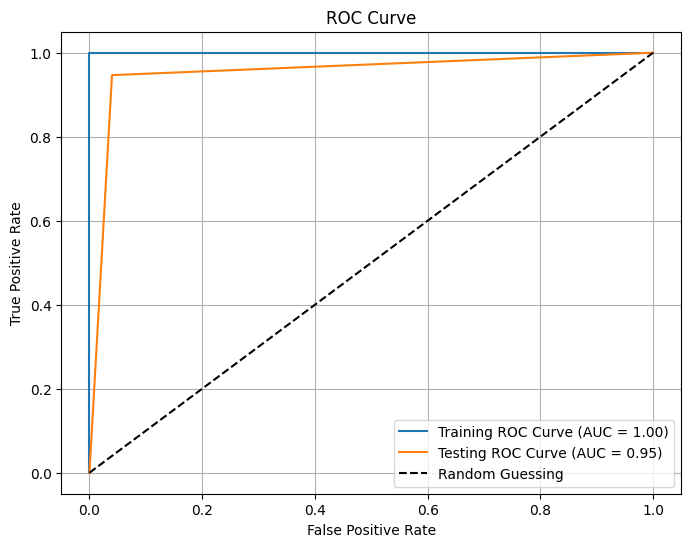

In [ ]:
# Plot ROC curve for training and testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### KNNClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


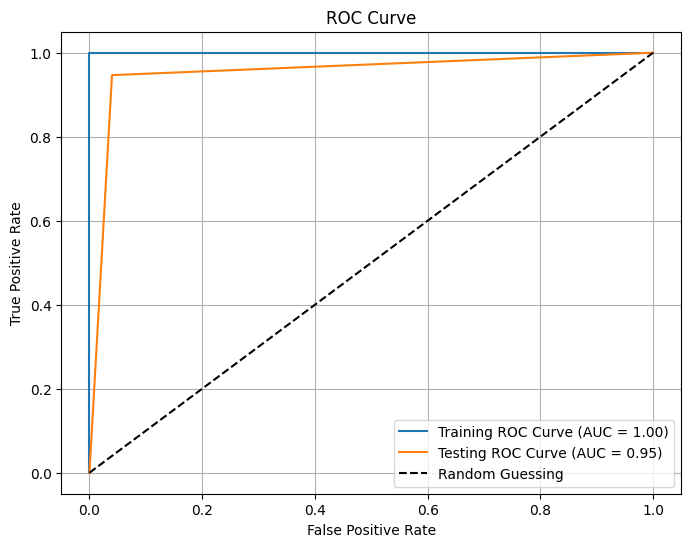

In [ ]:
# Plot ROC curve for training and testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### No we will focus on selecting the best threshold for maximum accuracy

In [ ]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9853333333333334


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.51,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [ ]:
final_prediction

0      0.882762
1      0.118323
2      0.813783
3      0.752853
4      0.544947
         ...   
595    0.123840
596    0.120345
597    0.876697
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [ ]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90228779, 0.90077475, 0.8019465 ,
       0.8005558 , 0.79930204, 0.79912833, 0.78387064, 0.78321156,
       0.76488614, 0.76037124, 0.71451656, 0.71137362, 0.70721721,
       0.70643711, 0.67268151, 0.66243537, 0.59656376, 0.59614346,
       0.58962652, 0.58736186, 0.58646627, 0.57050386, 0.56899047,
       0.56389283, 0.54494674, 0.54127948, 0.52855932, 0.49366892,
       0.45990225, 0.44044916, 0.4371034 , 0.37964628, 0.37629719,
       0.36807343, 0.35336612, 0.23198424, 0.22646893, 0.21371233,
       0.21098417, 0.12796807, 0.1278351 , 0.10498954])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.440449,0.960000
30,0.459902,0.960000
32,0.437103,0.958333
29,0.493669,0.958333
28,0.528559,0.956667


In [ ]:
accuracy_ls

,thresholds,accuracy
31,0.440449,0.960000
30,0.459902,0.960000
32,0.437103,0.958333
29,0.493669,0.958333
28,0.528559,0.956667
27,0.541279,0.956667
26,0.544947,0.956667
22,0.586466,0.950000
25,0.563893,0.950000
23,0.570504,0.950000


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

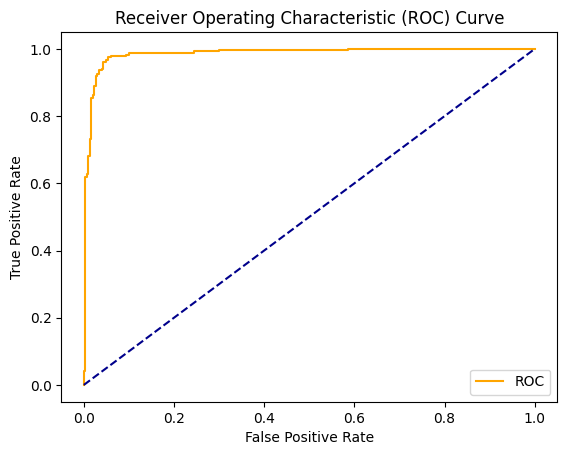

In [ ]:
plot_roc_curve(fpr,tpr)